In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('./selection - tournament - logs/logs.txt', delimiter=',')

df.head()

,run,enemy,generation,fitness,mean.fitness,std.fitness
0,25/09/2024 13:15:59,1,0,3.996,-5.538,1.781
1,25/09/2024 13:15:59,1,1,39.014,-2.744,9.378
2,25/09/2024 13:15:59,1,2,47.979,5.075,14.339
3,25/09/2024 13:15:59,1,3,47.979,11.066,13.620
4,25/09/2024 13:15:59,1,4,47.979,17.320,13.980


## Visualization of runs per enemey

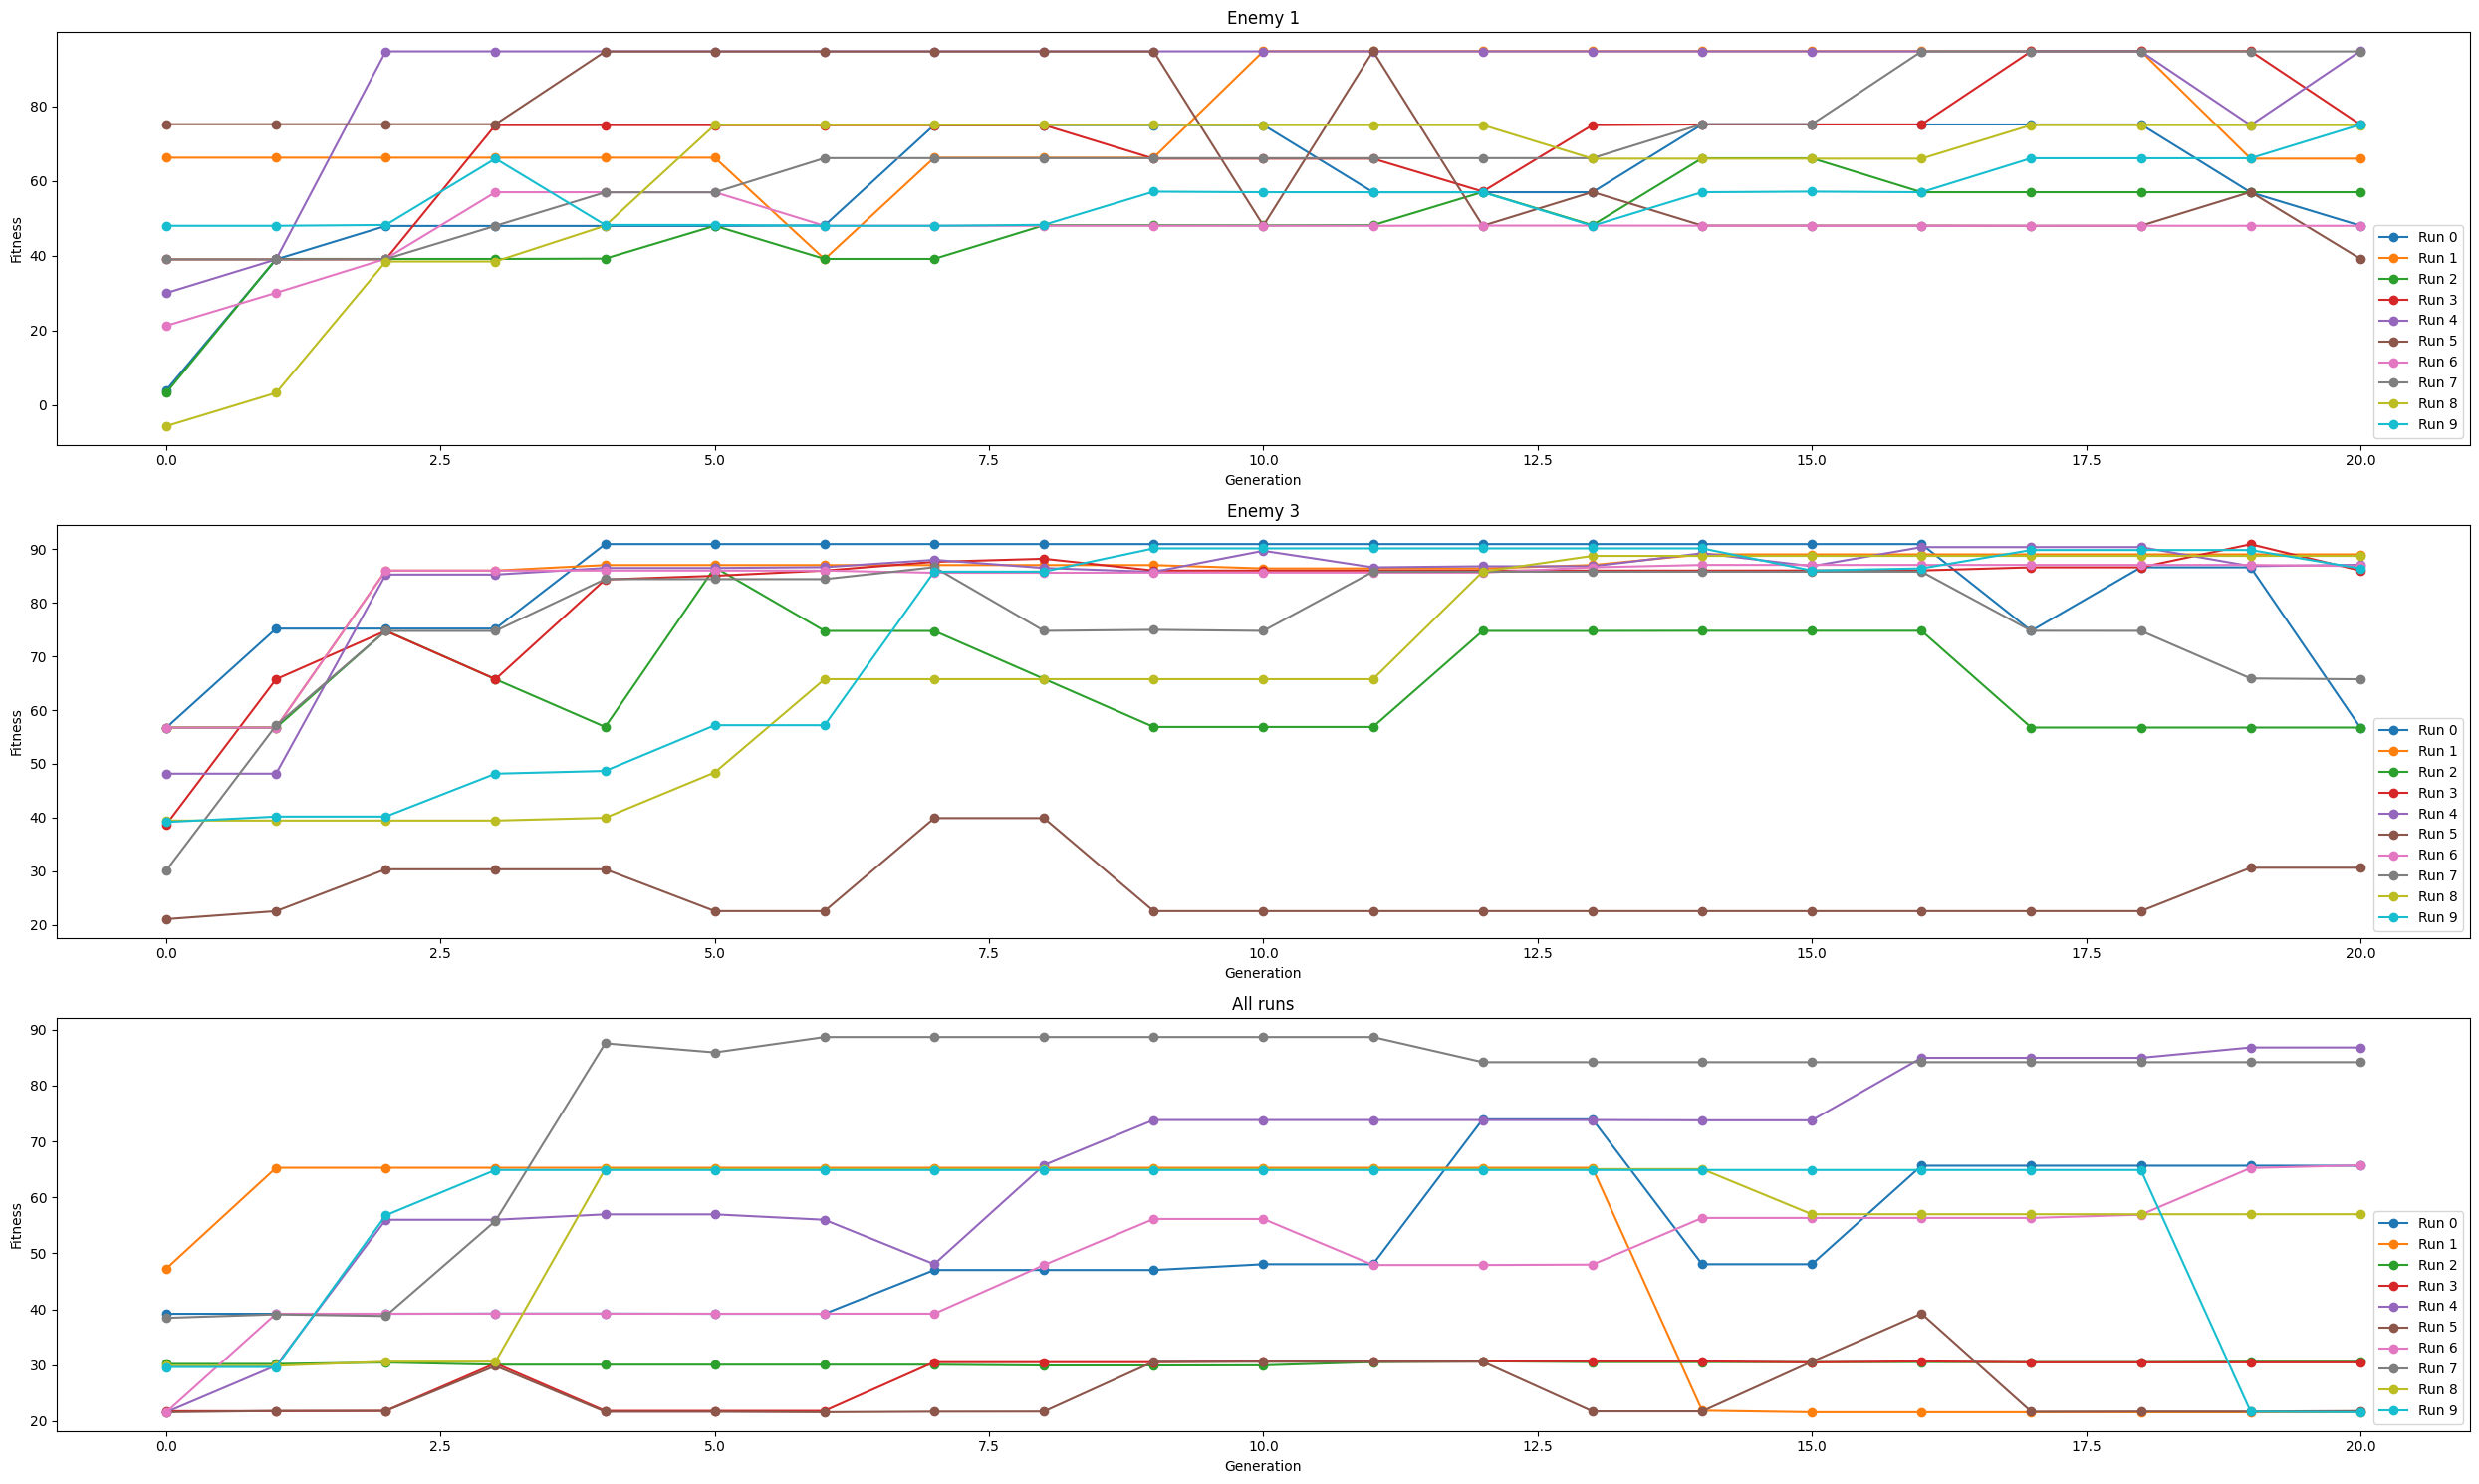

In [8]:
# Set the number of enemies and runs
enemies = df['enemy'].unique()

# Create subplots for each enemy
fig, axs = plt.subplots(3, 1, figsize=(25, 15))

# If there's only one enemy, axs is not a list, so wrap it in a list
if len(enemies) == 1:
    axs = [axs]

# Iterate through each enemy and plot their runs
for i, enemy in enumerate(enemies):
    
    ax = axs[i]
    enemy_data = df[df['enemy'] == enemy]
    runs = enemy_data['run'].unique()

    # Plot each run for this enemy
    for run_id, run in enumerate(runs):
        data = enemy_data[enemy_data['run'] == run]
        ax.plot(data['generation'], data['fitness'], marker='o', label=f'Run {run_id}')
    
    # Customize the plot for this enemy
    ax.set_title(f'Enemy {enemy}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.legend(loc=4)

# Display the plot
plt.tight_layout()
plt.show()

## The mean fitness value of the population per generation

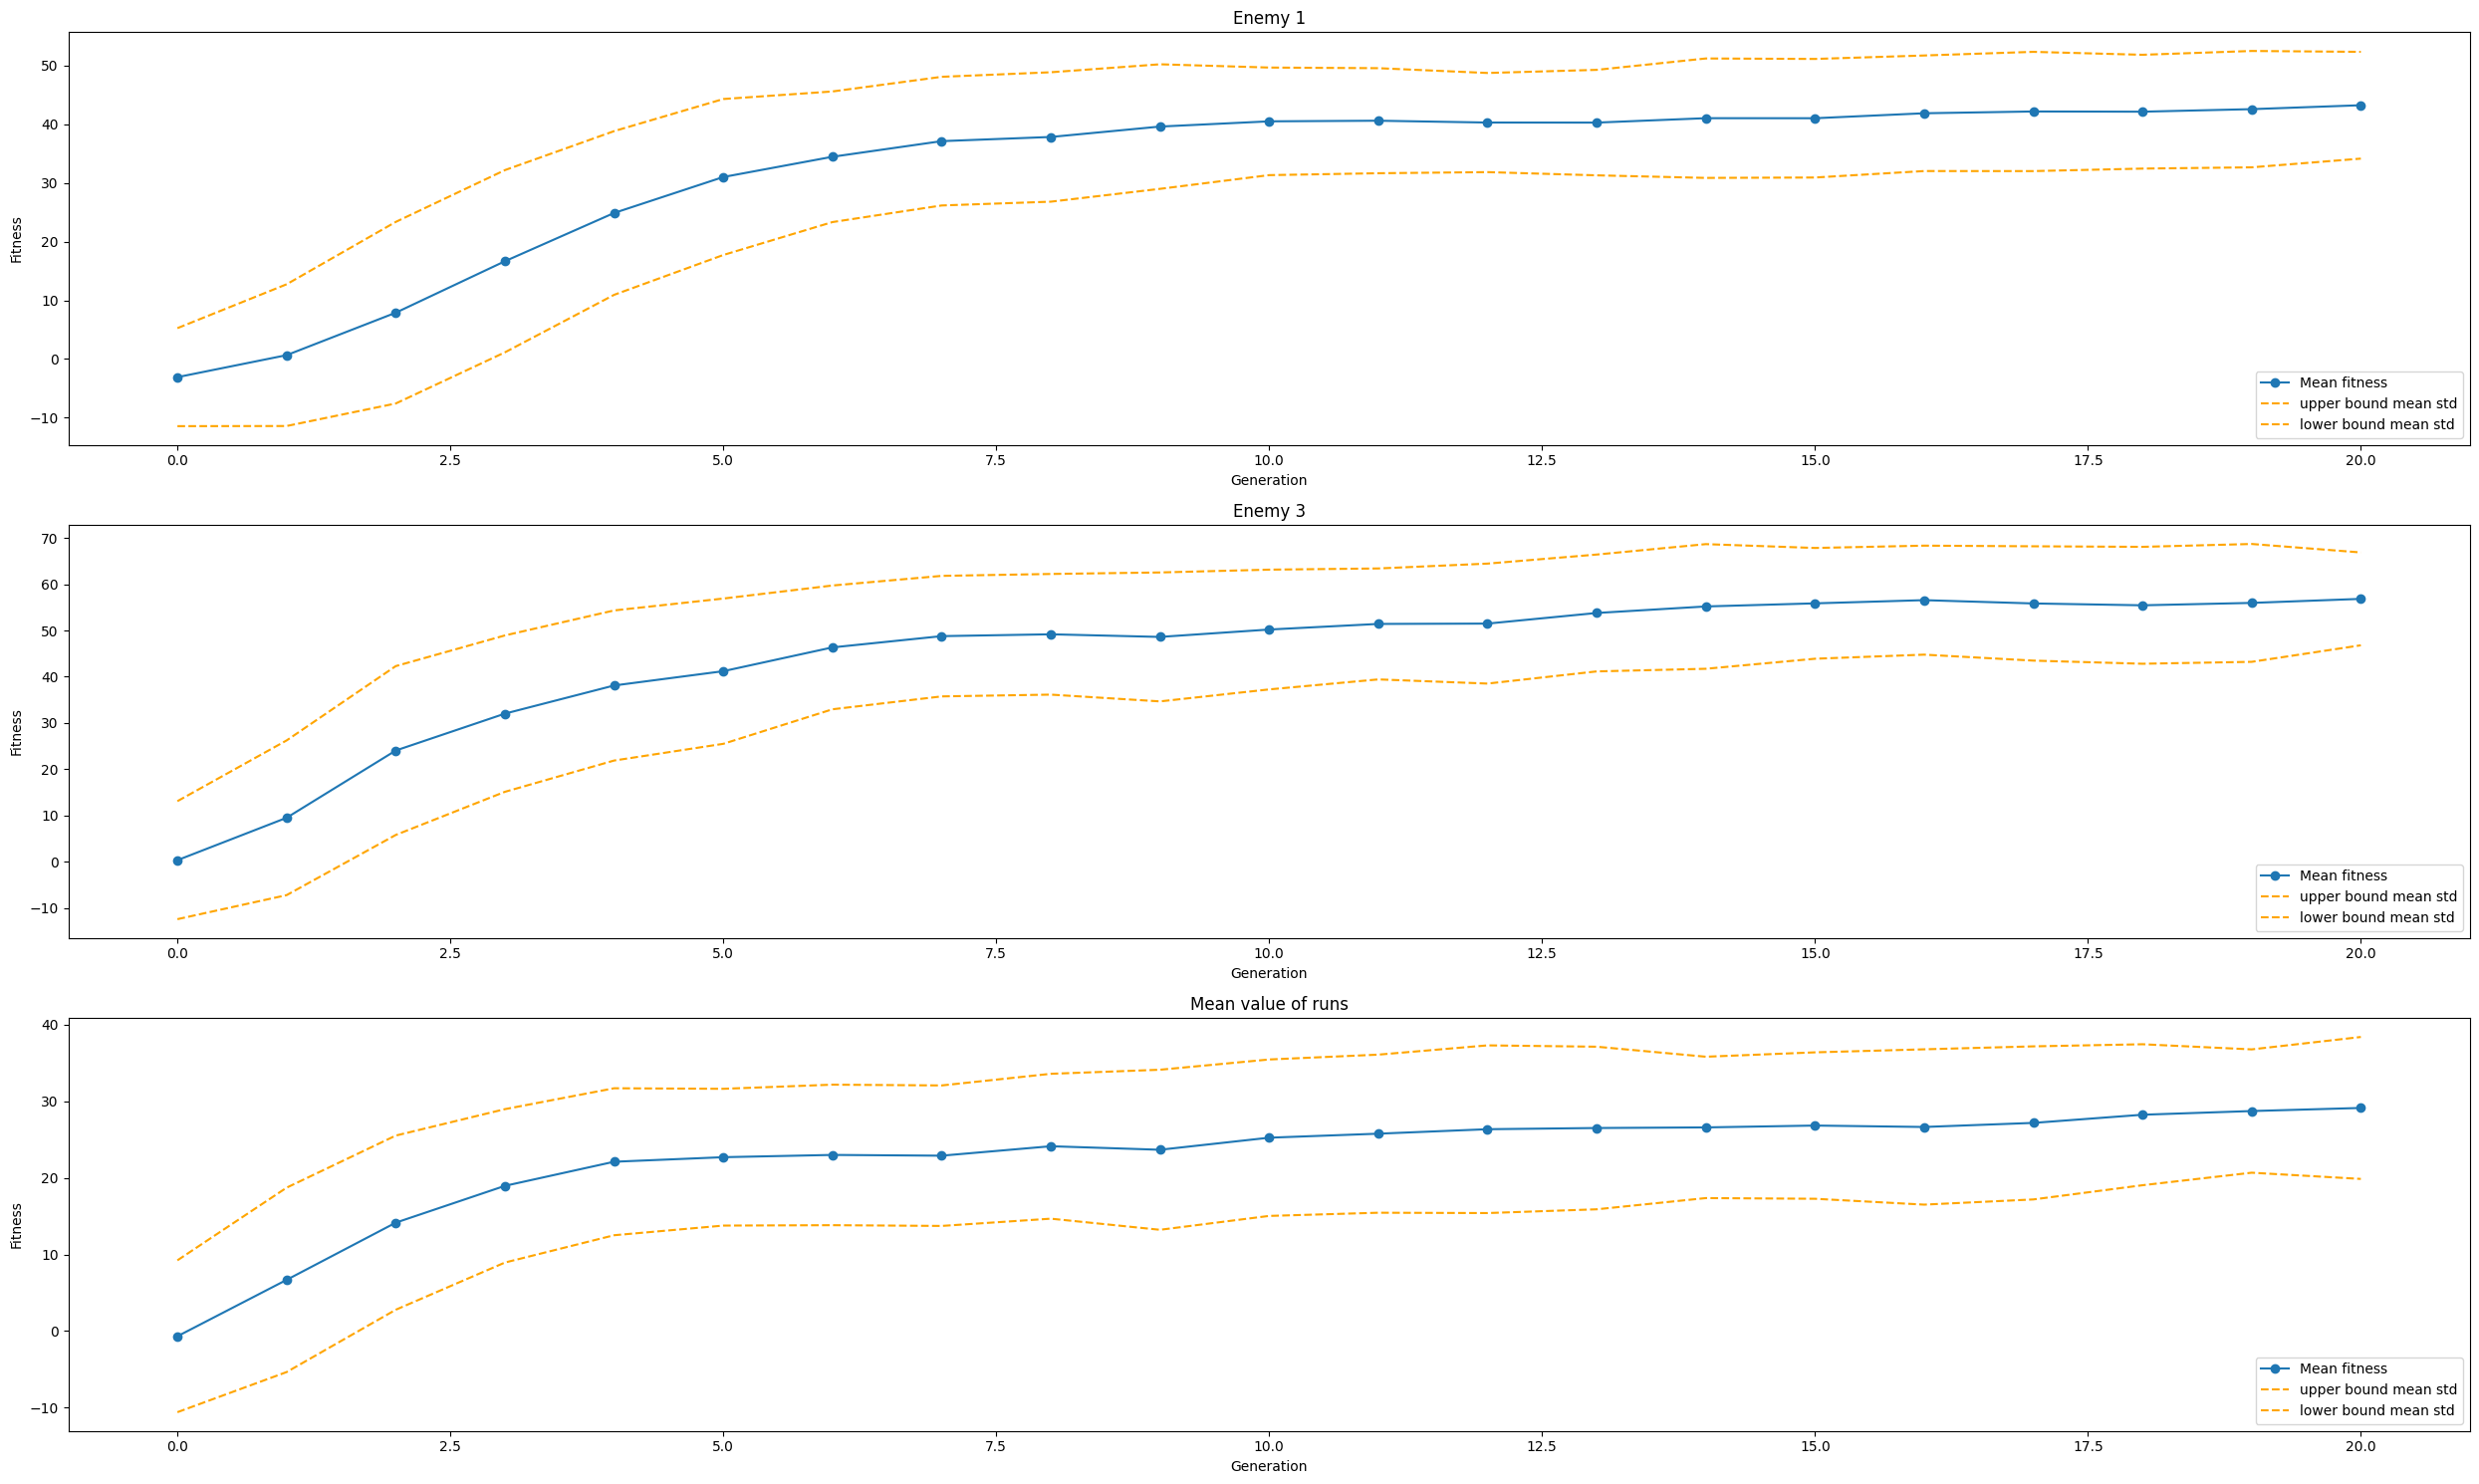

In [40]:
# get mean values of runs
data = df.groupby(['enemy', 'generation'])[['fitness', 'mean.fitness', 'std.fitness']].mean().reset_index(drop=False)

# Set the number of enemies and runs
enemies = data['enemy'].unique()

# Create subplots for each enemy
fig, axs = plt.subplots(3, 1, figsize=(25, 15))

# If there's only one enemy, axs is not a list, so wrap it in a list
if len(enemies) == 1:
    axs = [axs]

# Iterate through each enemy and plot their runs
for i, enemy in enumerate(enemies):
    
    ax = axs[i]
    enemy_data = data[data['enemy'] == enemy]

    ax.plot(enemy_data['generation'], enemy_data['mean.fitness'], marker='o', label='Mean fitness')

    ub = enemy_data['mean.fitness'] + enemy_data['std.fitness']
    lb = enemy_data['mean.fitness'] - enemy_data['std.fitness']

    ax.plot(enemy_data['generation'],ub , color = 'orange', linestyle='dashed', label='upper bound mean std')
    ax.plot(enemy_data['generation'],lb , color = 'orange', linestyle='dashed', label='lower bound mean std')
    
    # Customize the plot for this enemy
    ax.set_title(f'Enemy {enemy}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.legend(loc=4)

# Display the plot
plt.tight_layout()
plt.show()